#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

#### Importing & Loading Dataset

In [2]:
df = pd.read_csv('loan-train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

#### Handling Categorical values

In [5]:
df['Gender']=df['Gender'].map({'Female':1,'Male':0})
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Semiurban':1, 'Rural':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


#### Checking Null values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Filling Null values

In [7]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].str.replace('+','')
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 62.5+ KB


#### Changing the data type of each float cloumn to int

In [10]:
df['Gender']=df['Gender'].astype('int64')
df['Married']=df['Married'].astype('int64')
df['Dependents']=df['Dependents'].astype('int64')
df['Self_Employed']=df['Self_Employed'].astype('int64')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int64')
df['LoanAmount']=df['LoanAmount'].astype('int64')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int64')
df['Credit_History']=df['Credit_History'].astype('int64')

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0,120,360,1,2,1
1,LP001003,0,1,1,1,0,4583,1508,128,360,1,0,0
2,LP001005,0,1,0,1,1,3000,0,66,360,1,2,1
3,LP001006,0,1,0,0,0,2583,2358,120,360,1,2,1
4,LP001008,0,0,0,1,0,6000,0,141,360,1,2,1


#### Final Dataset shape

In [12]:
df.shape

(614, 13)

In [13]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0,120,360,1,2,1
1,0,1,1,1,0,4583,1508,128,360,1,0,0
2,0,1,0,1,1,3000,0,66,360,1,2,1
3,0,1,0,0,0,2583,2358,120,360,1,2,1
4,0,0,0,1,0,6000,0,141,360,1,2,1


#### Exploratory Data Analysis
Comparison b/w Male & Female on getting Loan

Loan_Status    0    1
Gender               
0            155  347
1             37   75


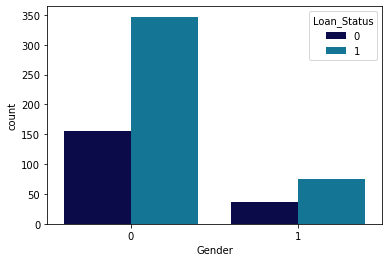

In [14]:
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette='ocean')
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Hence, Males has more chance of getting loan

Comparison b/w Married & Unmarried on getting Loan

Loan_Status    0    1
Married              
0             79  134
1            113  288


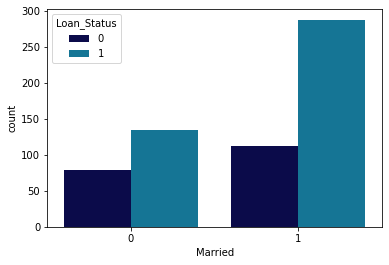

In [15]:
sns.countplot(df['Married'],hue=df['Loan_Status'],palette='ocean')
print(pd.crosstab(df['Married'],df['Loan_Status']))

Married persons has more chance of getting loan 

Comparison b/w Graduated & Ungraduated on getting loans

Loan_Status    0    1
Education            
0             52   82
1            140  340


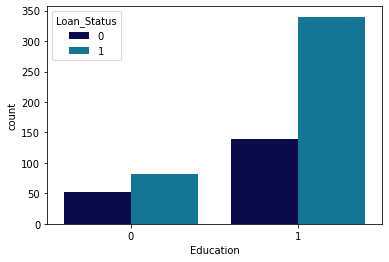

In [16]:
sns.countplot(df['Education'],hue=df['Loan_Status'],palette='ocean')
print(pd.crosstab(df['Education'],df['Loan_Status']))

Graduates has more chances of getting loan

Comparison b/w Selfemployed & Unemployed on getting loans

Loan_Status      0    1
Self_Employed          
0              166  366
1               26   56


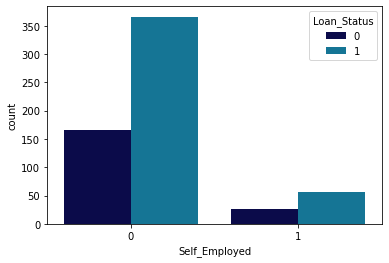

In [17]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette='ocean')
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Unemployed has more chance of getting loan

#### Displaying Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

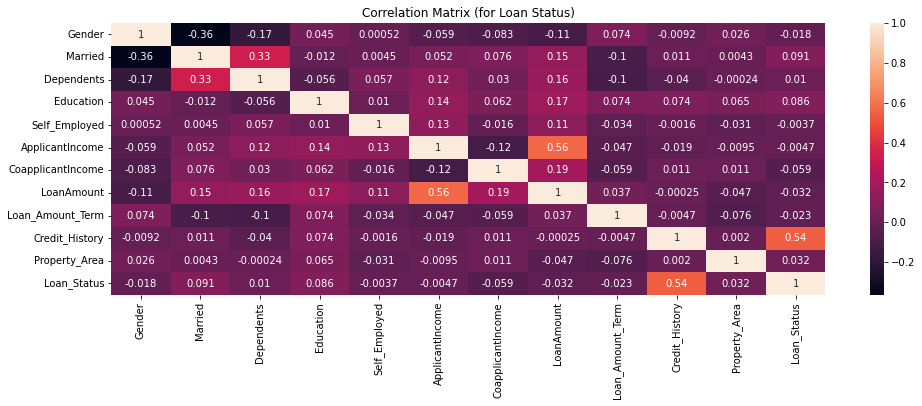

In [18]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

The above figure denotes Loan_Status is heavily dependent on the Credit_History. Because Credit_History(Independent Variable)
has maximum correlation with Loan_Status(Dependent Variable).

#### Handling Imbalance Data

In [19]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

#### dividing the dataset into dependent and independent y and x respectively

In [20]:
x.shape

(614, 11)

In [21]:
y.shape

(614,)

In [22]:
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    347
0    347
Name: Loan_Status, dtype: int64


In [23]:
names = x_bal.columns
names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [24]:
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0,120,360,1,2
1,0,1,0,1,1,3000,0,66,360,1,2
2,0,1,0,0,0,2583,2358,120,360,1,2
3,0,0,0,1,0,6000,0,141,360,1,2
4,0,1,2,1,1,5417,4196,267,360,1,2


#### Scaling the Dataset
performing feature scaling operation using standard scaller an x part ofthe dataset because there different type of value in the columns

In [25]:
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal,columns=names)
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.429302,-1.132649,-0.681317,0.596212,-0.332265,0.071789,-0.508884,-0.312333,0.320179,0.622896,1.327335
1,-0.429302,0.882886,-0.681317,0.596212,3.009646,-0.367990,-0.508884,-0.994483,0.320179,0.622896,1.327335
2,-0.429302,0.882886,-0.681317,-1.677256,-0.332265,-0.432359,0.185205,-0.312333,0.320179,0.622896,1.327335
3,-0.429302,-1.132649,-0.681317,0.596212,-0.332265,0.095097,-0.508884,-0.047053,0.320179,0.622896,1.327335
4,-0.429302,0.882886,1.487645,0.596212,3.009646,0.005104,0.726229,1.544629,0.320179,0.622896,1.327335


#### Splitting Dataset

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_bal,y_bal, test_size=0.33, random_state=42)

In [27]:
x_train.shape

(464, 11)

In [28]:
y_train.shape, y_test.shape

((464,), (230,))

In [29]:
print(x_train)

       Gender   Married  Dependents  Education  Self_Employed  \
349  2.329362 -1.132649    0.403164  -1.677256      -0.332265   
328 -0.429302  0.882886    1.487645  -1.677256      -0.332265   
33  -0.429302  0.882886   -0.681317   0.596212      -0.332265   
429 -0.429302  0.882886    1.487645   0.596212       3.009646   
354 -0.429302 -1.132649   -0.681317   0.596212      -0.332265   
..        ...       ...         ...        ...            ...   
71  -0.429302  0.882886   -0.681317   0.596212      -0.332265   
106 -0.429302  0.882886    2.572126   0.596212      -0.332265   
270 -0.429302 -1.132649   -0.681317   0.596212      -0.332265   
435 -0.429302  0.882886    2.572126   0.596212      -0.332265   
102  2.329362 -1.132649   -0.681317   0.596212      -0.332265   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
349        -0.120084          -0.508884   -0.804997          0.320179   
328        -0.385124          -0.508884   -1.259763         -2.451021   


In [30]:
print(x_test)

       Gender   Married  Dependents  Education  Self_Employed  \
381 -0.429302  0.882886   -0.681317   0.596212      -0.332265   
666 -0.429302 -1.132649   -0.681317  -1.677256      -0.332265   
257 -0.429302  0.882886    1.487645   0.596212       3.009646   
338 -0.429302  0.882886   -0.681317  -1.677256      -0.332265   
319 -0.429302  0.882886    2.572126   0.596212      -0.332265   
..        ...       ...         ...        ...            ...   
648 -0.429302 -1.132649   -0.681317  -1.677256      -0.332265   
271 -0.429302 -1.132649   -0.681317   0.596212      -0.332265   
494 -0.429302  0.882886    2.572126   0.596212      -0.332265   
286 -0.429302  0.882886    2.572126   0.596212      -0.332265   
137 -0.429302  0.882886   -0.681317   0.596212      -0.332265   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
381         1.745540          -0.508884   -0.438657          0.320179   
666        -0.242184          -0.115037   -0.438657          0.320179   


In [31]:
print(y_train)

349    0
328    0
33     1
429    1
354    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 464, dtype: int64


In [32]:
print(y_test)

381    1
666    0
257    1
338    0
319    1
      ..
648    0
271    1
494    1
286    1
137    1
Name: Loan_Status, Length: 230, dtype: int64


#### Model Building

#### RandomForest model

In [33]:
from tensorflow.keras import Model
def RandomForest(x_train,x_test,y_train,y_test):
  model = RandomForestClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(yPred,y_test))

In [34]:
RandomForest(x_train,x_test,y_train,y_test)

1.0
0.808695652173913


#### DecisionTree model

In [35]:
def decisionTree(x_train,x_test,y_train,y_test):
 model = DecisionTreeClassifier()
 model.fit(x_train,y_train)
 y_tr = model.predict(x_train)
 print(accuracy_score(y_tr,y_train))
 yPred = model.predict(x_test)
 print(accuracy_score(yPred,y_test))

In [36]:
decisionTree(x_train,x_test,y_train,y_test)

1.0
0.8


#### KNN Model

In [37]:
def KNN(x_train,x_test,y_train,y_test):
  model = KNeighborsClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(yPred,y_test))

In [38]:
KNN(x_train,x_test,y_train,y_test)

0.8297413793103449
0.7521739130434782


#### XGB Model

In [39]:
#XGB model
def XGB(x_train,x_test,y_train,y_test):
  model = GradientBoostingClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(yPred,y_test))

In [40]:
XGB(x_train,x_test,y_train,y_test)

0.9267241379310345
0.7956521739130434


In [41]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units=100, activation='relu', input_dim=11))
classifier.add(Dense(units=50, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(x_train,y_train,batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 120ms/step - loss: 0.6789 - accuracy: 0.5876 - val_loss: 0.6803 - val_accuracy: 0.4946
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6332 - accuracy: 0.6846 - val_loss: 0.6438 - val_accuracy: 0.5699
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5956 - accuracy: 0.7547 - val_loss: 0.6147 - val_accuracy: 0.6882
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5625 - accuracy: 0.7817 - val_loss: 0.5912 - val_accuracy: 0.7097
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5325 - accuracy: 0.7898 - val_loss: 0.5688 - val_accuracy: 0.7204
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5061 - accuracy: 0.7898 - val_loss: 0.5479 - val_accuracy: 0.7204
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4850 - accuracy: 0.7898 - val_loss: 0.5326 - val_accuracy: 0.7204
Epoch 8/100
4/4 [==

In [42]:
y_pred = classifier.predict(x_test)

8/8 [==============================] - 0s 1ms/step


In [43]:
y_pred

array([[6.57985866e-01],
       [6.46967232e-01],
       [9.98519182e-01],
       [8.07339291e-07],
       [3.94056708e-01],
       [6.14007823e-02],
       [3.44176650e-01],
       [4.98121589e-01],
       [5.06099354e-07],
       [2.95984179e-01],
       [9.66010749e-01],
       [4.17322099e-01],
       [5.81493229e-02],
       [4.23612222e-02],
       [9.94167626e-01],
       [9.05420005e-01],
       [9.78730857e-01],
       [1.11984391e-05],
       [8.27317243e-04],
       [2.69443663e-05],
       [6.33708000e-01],
       [5.30525088e-01],
       [9.67998326e-01],
       [9.41083014e-01],
       [7.30698157e-05],
       [1.92857951e-01],
       [9.11767304e-01],
       [3.87267534e-07],
       [6.45809829e-01],
       [8.78498375e-01],
       [9.24025893e-01],
       [1.15657446e-03],
       [4.07566071e-01],
       [3.69667590e-01],
       [8.02358426e-03],
       [6.80389881e-01],
       [1.60987757e-03],
       [3.28999772e-06],
       [9.55391884e-01],
       [3.87716651e-01],


In [44]:
y_pred = y_pred.astype(int)
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [45]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       110
           1       0.82      0.78      0.80       120

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



In [47]:
confusion_matrix(y_test,dt.predict(x_test))

array([[89, 21],
       [26, 94]], dtype=int64)

#### checking the accuracy

In [48]:
print(accuracy_score(y_pred,y_test))
print("ANN Model")
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
print("classification_report")
print(classification_report(y_test, y_pred))

0.4782608695652174
ANN Model
confusion_matrix
[[110   0]
 [120   0]]
classification_report
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       110
           1       0.00      0.00      0.00       120

    accuracy                           0.48       230
   macro avg       0.24      0.50      0.32       230
weighted avg       0.23      0.48      0.31       230



In [49]:
dt.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([1], dtype=int64)

In [50]:
rfr = RandomForestClassifier()
rfr.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       110
           1       0.82      0.78      0.80       120

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



In [52]:
rfr.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([0], dtype=int64)

In [53]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       110
           1       0.82      0.78      0.80       120

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



In [55]:
knn.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

array([1], dtype=int64)

In [56]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train,y_train)

GradientBoostingClassifier()

In [57]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       110
           1       0.82      0.78      0.80       120

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



In [58]:
xgb.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([0], dtype=int64)

In [59]:
classifier.save("loan.h5")
y_pred = classifier.predict(x_test)


8/8 [==============================] - 0s 2ms/step


In [60]:
y_pred

array([[6.57985866e-01],
       [6.46967232e-01],
       [9.98519182e-01],
       [8.07339291e-07],
       [3.94056708e-01],
       [6.14007823e-02],
       [3.44176650e-01],
       [4.98121589e-01],
       [5.06099354e-07],
       [2.95984179e-01],
       [9.66010749e-01],
       [4.17322099e-01],
       [5.81493229e-02],
       [4.23612222e-02],
       [9.94167626e-01],
       [9.05420005e-01],
       [9.78730857e-01],
       [1.11984391e-05],
       [8.27317243e-04],
       [2.69443663e-05],
       [6.33708000e-01],
       [5.30525088e-01],
       [9.67998326e-01],
       [9.41083014e-01],
       [7.30698157e-05],
       [1.92857951e-01],
       [9.11767304e-01],
       [3.87267534e-07],
       [6.45809829e-01],
       [8.78498375e-01],
       [9.24025893e-01],
       [1.15657446e-03],
       [4.07566071e-01],
       [3.69667590e-01],
       [8.02358426e-03],
       [6.80389881e-01],
       [1.60987757e-03],
       [3.28999772e-06],
       [9.55391884e-01],
       [3.87716651e-01],


In [61]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [62]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1, -1)
  sample_valu = sc.transform(sample_value)
  return classifier.predict(sample_value)

In [63]:
sample_value = [[0,0,0,1,1,4276,1542,145,240,0,1]]

In [64]:
if predict_exit(sample_value)>0.5:
  print('Prediction: High Chance of Loan Approval!')
else:
  print('Prediction: Low Chance of Loan Approval!')


1/1 [==============================] - 0s 64ms/step
Prediction: Low Chance of Loan Approval!


In [65]:
sample_value = [[1,0, 1, 1, 1, 45, 14,45, 240, 1,1]]

In [66]:
if predict_exit(sample_value)>0.5:
  print('Prediction: High Chance of Loan Approval!')
else:
  print('Prediction: Low Chance of Loan Approval!')


1/1 [==============================] - 0s 36ms/step
Prediction: Low Chance of Loan Approval!
